In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-vat-data/Fake Data.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading excel file
file_path = '/kaggle/input/fake-vat-data/Fake Data.xlsx'
xls = pd.ExcelFile(file_path)

#storing tab names in a list = sheetnames
sheet_names = xls.sheet_names
print(sheet_names)

['Jan', 'Feb']


In [4]:
#reading tab sheets data
sheet_previews = {name: xls.parse(name).head() for name in sheet_names}
sheet_previews


{'Jan':   Supply Type  Invoice Number       Date Customer/supplier Name  \
 0           S           123.0 2024-01-01                    ABC   
 1           S           456.0 2024-01-02                    DEF   
 2           S           789.0 2024-01-02                    DEF   
 3           S           123.0 2024-01-02                    ABC   
 4           S          1011.0 2024-01-03                    GHI   
 
    Supply/Purchase Value   VAT Value   Invoice Value Recoverable    Box  
 0                    0.00        0.00           0.00           Y  Box A  
 1                    0.00        0.00           0.00           Y  Box A  
 2                    0.00        0.00           0.00           Y  Box A  
 3               440984.04    22049.20      463033.24           Y  Box A  
 4               576107.04    28805.35      604912.39           Y  Box A  ,
 'Feb':   Report date: 2024-03-01 00:00:00           Unnamed: 2   Unnamed: 3  \
 0     Run by:             J Bloggs                 

In [5]:
# Define each tab sheet
cleaned_df_jan = xls.parse('Jan')
cleaned_df_feb = xls.parse('Feb', skiprows = 4)
print("jan--------------")
print(cleaned_df_jan.head(5))
print("feb--------------")
print(cleaned_df_feb.head(5))

jan--------------
  Supply Type  Invoice Number       Date Customer/supplier Name  \
0           S           123.0 2024-01-01                    ABC   
1           S           456.0 2024-01-02                    DEF   
2           S           789.0 2024-01-02                    DEF   
3           S           123.0 2024-01-02                    ABC   
4           S          1011.0 2024-01-03                    GHI   

   Supply/Purchase Value   VAT Value   Invoice Value Recoverable    Box  
0                    0.00        0.00           0.00           Y  Box A  
1                    0.00        0.00           0.00           Y  Box A  
2                    0.00        0.00           0.00           Y  Box A  
3               440984.04    22049.20      463033.24           Y  Box A  
4               576107.04    28805.35      604912.39           Y  Box A  
feb--------------
  Supply Type    #                 Date Recoverable Customer/supplier Name  \
0       Sales  871  2024-02-01 00:00:00

In [6]:
#for Jan Data 
empty_rows_threshold = 1  # Change this number as needed based on your data

# Check for consecutive empty rows
empty_row_count = 0
valid_data_rows = []

for idx, row in cleaned_df_jan.iterrows():
    if row.isnull().all():
        empty_row_count += 1
    else:
        empty_row_count = 0

    # If empty row count is less than threshold, consider it valid data
    if empty_row_count < empty_rows_threshold:
        valid_data_rows.append(row)
    else:
        # Stop reading further rows after threshold is reached
        break

# Create cleaned dataframe with valid data only
cleaned_df_jan = pd.DataFrame(valid_data_rows)

print(cleaned_df_jan)

   Supply Type  Invoice Number       Date Customer/supplier Name  \
0            S           123.0 2024-01-01                    ABC   
1            S           456.0 2024-01-02                    DEF   
2            S           789.0 2024-01-02                    DEF   
3            S           123.0 2024-01-02                    ABC   
4            S          1011.0 2024-01-03                    GHI   
5            S          1213.0 2024-01-04                    ABC   
6            S          1415.0 2024-01-05                    GHI   
7            S          1013.0 2024-01-06                    GHI   
8            S          1915.0 2024-01-07                    GHI   
9            S          1512.0 2024-01-07                    ABC   
10           S          6578.0 2024-01-08                    JKL   
11           S          4953.0 2024-01-09                    JKL   
12           S          6748.0 2024-01-10                    ABC   
13           S           484.0 2024-01-11       

In [7]:
df_non_empty = cleaned_df_jan.shape[0]
df_non_empty

51

In [8]:
#removing last 2 rows data because they stores march month data values
cleaned_df_feb = cleaned_df_feb[:-2]

In [9]:
# Check the columns of both sheets to verify the structure 
jan_columns = cleaned_df_jan.columns
feb_columns = cleaned_df_feb.columns

jan_columns
print()
feb_columns
#mismatch columnnames and their sequence

Index(['Supply Type', '#', 'Date', 'Recoverable', 'Customer/supplier Name',
       'Net', 'Gross', 'Tax', 'Box'],
      dtype='object')

In [10]:
print(cleaned_df_jan.isnull().sum())

Supply Type               0
Invoice Number            0
Date                      0
Customer/supplier Name    0
Supply/Purchase Value     0
VAT Value                 0
Invoice Value             0
Recoverable               0
Box                       0
dtype: int64


In [11]:
#removed extra space in column names for Jan
cleaned_df_jan.columns = cleaned_df_jan.columns.str.strip()

#changed datetime format for jan 
cleaned_df_jan['Date'] = cleaned_df_jan['Date'].dt.strftime('%Y-%m-%d')

In [12]:
#renaming of February columns to get match with January's format
cleaned_df_feb = cleaned_df_feb.rename(columns={ 
    'Net': 'Supply/Purchase Value',
    'Tax': 'VAT Value',
    'Gross': 'Invoice Value',
    '#': 'Invoice Number'
})

cleaned_df_feb.columns

Index(['Supply Type', 'Invoice Number', 'Date', 'Recoverable',
       'Customer/supplier Name', 'Supply/Purchase Value', 'Invoice Value',
       'VAT Value', 'Box'],
      dtype='object')

In [13]:
#column consistency/ aranged in a sequence
cleaned_df_jan = cleaned_df_jan[['Supply Type', 'Invoice Number', 'Date', 'Customer/supplier Name',
                 'Supply/Purchase Value', 'VAT Value', 'Invoice Value', 'Recoverable', 'Box']]

cleaned_df_feb = cleaned_df_feb[['Supply Type', 'Invoice Number', 'Date', 'Customer/supplier Name', 
                 'Supply/Purchase Value', 'VAT Value', 'Invoice Value', 'Recoverable', 'Box']]

In [14]:
#validationg columns datatype for jan
cleaned_df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Supply Type             51 non-null     object 
 1   Invoice Number          51 non-null     float64
 2   Date                    51 non-null     object 
 3   Customer/supplier Name  51 non-null     object 
 4   Supply/Purchase Value   51 non-null     float64
 5   VAT Value               51 non-null     float64
 6   Invoice Value           51 non-null     float64
 7   Recoverable             51 non-null     object 
 8   Box                     51 non-null     object 
dtypes: float64(4), object(5)
memory usage: 4.0+ KB


In [15]:
#validationg columns datatype for feb
cleaned_df_feb.info()
#found incorrect datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Supply Type             49 non-null     object 
 1   Invoice Number          49 non-null     int64  
 2   Date                    49 non-null     object 
 3   Customer/supplier Name  49 non-null     object 
 4   Supply/Purchase Value   49 non-null     float64
 5   VAT Value               49 non-null     float64
 6   Invoice Value           49 non-null     int64  
 7   Recoverable             49 non-null     object 
 8   Box                     49 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.6+ KB


In [16]:
#removing any non-numeric characters for invoice value column
cleaned_df_feb['Invoice Value'] = (
    cleaned_df_feb['Invoice Value']
    .astype(str)                            # Convert to string
    .str.replace('[\$,]', '', regex=True)   # Remove dollar signs and commas
    .astype(float)                          # Convert to float
)

In [17]:
# Step 1: Check the original data
print("Original 'Invoice Number' values:")
print(cleaned_df_feb['Invoice Number'].head(10))  # Preview the first 10 rows

# Step 2: Convert column to string and clean data
cleaned_df_feb['Invoice Number'] = (
    cleaned_df_feb['Invoice Number']
    .astype(str)                              # Ensure all values are strings
    .str.replace(r'[\$,]', '', regex=True)    # Remove dollar signs and commas
    .str.replace(r'\s+', '', regex=True)      # Remove all spaces
    .replace('nan', '', regex=False)          # Handle 'nan' (from NaN conversion)
)

# Step 3: Convert to numeric (float) and coerce errors
cleaned_df_feb['Invoice Number'] = pd.to_numeric(cleaned_df_feb['Invoice Number'], errors='coerce').astype(float)

# Step 4: Check the result
print("\nConverted 'Invoice Number' values (as float):")
print(cleaned_df_feb['Invoice Number'].head(10))  # Preview the first 10 rows again
print("\nNaN values in 'Invoice Number':")
print(cleaned_df_feb['Invoice Number'].isnull().sum())  # Count NaN values

# Step 5: Identify non-numeric values (if any)
non_numeric_rows = cleaned_df_feb[
    cleaned_df_feb['Invoice Number'].isnull() & 
    cleaned_df_feb['Invoice Number'].astype(str).str.contains(r'\D', na=False)
]
print("\nNon-numeric values in 'Invoice Number':")
print(non_numeric_rows)


Original 'Invoice Number' values:
0    871
1    591
2    926
3    941
4     20
5    742
6    697
7     10
8    618
9    328
Name: Invoice Number, dtype: int64

Converted 'Invoice Number' values (as float):
0    871.0
1    591.0
2    926.0
3    941.0
4     20.0
5    742.0
6    697.0
7     10.0
8    618.0
9    328.0
Name: Invoice Number, dtype: float64

NaN values in 'Invoice Number':
0

Non-numeric values in 'Invoice Number':
Empty DataFrame
Columns: [Supply Type, Invoice Number, Date, Customer/supplier Name, Supply/Purchase Value, VAT Value, Invoice Value, Recoverable, Box]
Index: []


In [18]:
#converting datatypes
#cleaned_df_feb['Invoice Number'] = pd.to_numeric(cleaned_df_feb['Invoice Number'], errors='coerce') 
# did not work for Convertion to float64
cleaned_df_feb['Date'] = pd.to_datetime(cleaned_df_feb['Date'], errors='coerce')                                   # Convert to datetime64[ns]
cleaned_df_feb['Supply/Purchase Value'] = pd.to_numeric(cleaned_df_feb['Supply/Purchase Value'], errors='coerce')  # Convert to float64
#cleaned_df_feb['Invoice Value'] = pd.to_numeric(cleaned_df_feb['Invoice Value'], errors='coerce')                   # Convert to float64

#Verify datatypes 
print("Feb: --------------------")
print(cleaned_df_feb.info())
print("Jan: --------------------")
print(cleaned_df_jan.info())

Feb: --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Supply Type             49 non-null     object        
 1   Invoice Number          49 non-null     float64       
 2   Date                    49 non-null     datetime64[ns]
 3   Customer/supplier Name  49 non-null     object        
 4   Supply/Purchase Value   49 non-null     float64       
 5   VAT Value               49 non-null     float64       
 6   Invoice Value           49 non-null     float64       
 7   Recoverable             49 non-null     object        
 8   Box                     49 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 3.6+ KB
None
Jan: --------------------
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  

In [19]:
#Date column format 
cleaned_df_feb['Date'] = pd.to_datetime(cleaned_df_feb['Date'], dayfirst=True, errors='coerce')
cleaned_df_feb['Date'] = cleaned_df_feb['Date'].dt.strftime('%d/%m/%Y')

print(cleaned_df_feb.tail(10))

   Supply Type  Invoice Number        Date Customer/supplier Name  \
39   Purchases            36.0  26/02/2024                    MNB   
40   Purchases           881.0  27/02/2024                    VCX   
41   Purchases           696.0  27/02/2024                    TYU   
42   Purchases           355.0  27/02/2024                    TYU   
43       Sales           370.0  28/02/2024                    ABC   
44       Sales           284.0  28/02/2024                    ABC   
45       Sales           122.0  28/02/2024                    ABC   
46       Sales           935.0  28/02/2024                    ABC   
47       Sales           665.0  29/02/2024                    STU   
48       Sales           218.0  29/02/2024                    STU   

    Supply/Purchase Value  VAT Value  Invoice Value Recoverable    Box  
39               62793.38     271.38        62522.0           N  Box C  
40               40365.05     295.05        40070.0           N  Box C  
41               5280

In [20]:
#replacing Sales -> S and Purchaces -> P in supply type column to get match with Jan data
cleaned_df_feb['Supply Type'] = cleaned_df_feb['Supply Type'].replace(
    {'Sales': 'S', 'Purchases': 'P'}
)

In [21]:
#validating Nan values
print(cleaned_df_jan.head(10))
print()


  Supply Type  Invoice Number        Date Customer/supplier Name  \
0           S           123.0  2024-01-01                    ABC   
1           S           456.0  2024-01-02                    DEF   
2           S           789.0  2024-01-02                    DEF   
3           S           123.0  2024-01-02                    ABC   
4           S          1011.0  2024-01-03                    GHI   
5           S          1213.0  2024-01-04                    ABC   
6           S          1415.0  2024-01-05                    GHI   
7           S          1013.0  2024-01-06                    GHI   
8           S          1915.0  2024-01-07                    GHI   
9           S          1512.0  2024-01-07                    ABC   

   Supply/Purchase Value  VAT Value  Invoice Value Recoverable    Box  
0                   0.00       0.00           0.00           Y  Box A  
1                   0.00       0.00           0.00           Y  Box A  
2                   0.00       0.00

In [22]:
print(cleaned_df_jan.isnull().sum())

Supply Type               0
Invoice Number            0
Date                      0
Customer/supplier Name    0
Supply/Purchase Value     0
VAT Value                 0
Invoice Value             0
Recoverable               0
Box                       0
dtype: int64


In [23]:
#validating Nan values

print(cleaned_df_feb.isnull().sum())

Supply Type               0
Invoice Number            0
Date                      0
Customer/supplier Name    0
Supply/Purchase Value     0
VAT Value                 0
Invoice Value             0
Recoverable               0
Box                       0
dtype: int64


In [24]:
cleaned_df_jan_cleaned = cleaned_df_jan.drop_duplicates(keep=False)
cleaned_df_feb_cleaned = cleaned_df_feb.drop_duplicates(keep=False)

In [25]:
combined_cleaned = pd.merge(cleaned_df_jan_cleaned, cleaned_df_feb_cleaned, on='Box', how='outer', suffixes=('_Jan', '_Feb'))

combined_cleaned.to_excel('cleaned_data.xlsx', index=False)

In [26]:
#aggregating columns to get total sales for each month and purchase sales by box
jan_summary = cleaned_df_jan_cleaned.groupby('Box').agg(
    Total_Supply_Purchase_Value=('Supply/Purchase Value', 'sum'),
    Total_VAT_Value=('VAT Value', 'sum'),
    Total_Invoice_Value=('Invoice Value', 'sum')
).reset_index()

feb_summary = cleaned_df_feb_cleaned.groupby('Box').agg(
    Total_Supply_Purchase_Value=('Supply/Purchase Value', 'sum'),
    Total_VAT_Value=('VAT Value', 'sum'),
    Total_Invoice_Value=('Invoice Value', 'sum')
).reset_index()

In [27]:
#combined both result and store in a excel sheet
combined_summary = pd.merge(jan_summary, feb_summary, on='Box', how='outer', suffixes=('_Jan', '_Feb'))

combined_summary.to_excel("VAT_Summary.xlsx", index=False)


In [28]:
#reading output file
final = pd.read_excel('VAT_Summary.xlsx')
print(final.head())
print()

     Box  Total_Supply_Purchase_Value_Jan  Total_VAT_Value_Jan  \
0  Box A                       4264199.98            213209.99   
1  Box B                         31591.76                 0.00   
2  Box C                        194526.87              9726.36   
3  Box D                              NaN                  NaN   

   Total_Invoice_Value_Jan  Total_Supply_Purchase_Value_Feb  \
0               4477409.97                       1023083.17   
1                 31591.76                        200114.25   
2                204253.23                       1348895.15   
3                      NaN                         10600.00   

   Total_VAT_Value_Feb  Total_Invoice_Value_Feb  
0            212933.87                   838430  
1              2409.25                   197705  
2              9540.78                  1339619  
3                 0.00                    10600  



In [29]:
#checks null values
print(final.isnull().sum())

Box                                0
Total_Supply_Purchase_Value_Jan    1
Total_VAT_Value_Jan                1
Total_Invoice_Value_Jan            1
Total_Supply_Purchase_Value_Feb    0
Total_VAT_Value_Feb                0
Total_Invoice_Value_Feb            0
dtype: int64


In [30]:
#replace null with 0
final.fillna(0, inplace=True)
final

,Box,Total_Supply_Purchase_Value_Jan,Total_VAT_Value_Jan,Total_Invoice_Value_Jan,Total_Supply_Purchase_Value_Feb,Total_VAT_Value_Feb,Total_Invoice_Value_Feb
0,Box A,4264199.98,213209.99,4477409.97,1023083.17,212933.87,838430
1,Box B,31591.76,0.00,31591.76,200114.25,2409.25,197705
2,Box C,194526.87,9726.36,204253.23,1348895.15,9540.78,1339619
3,Box D,0.00,0.00,0.00,10600.00,0.00,10600


In [31]:
#validation after replacement
print(final.isnull().sum())

Box                                0
Total_Supply_Purchase_Value_Jan    0
Total_VAT_Value_Jan                0
Total_Invoice_Value_Jan            0
Total_Supply_Purchase_Value_Feb    0
Total_VAT_Value_Feb                0
Total_Invoice_Value_Feb            0
dtype: int64


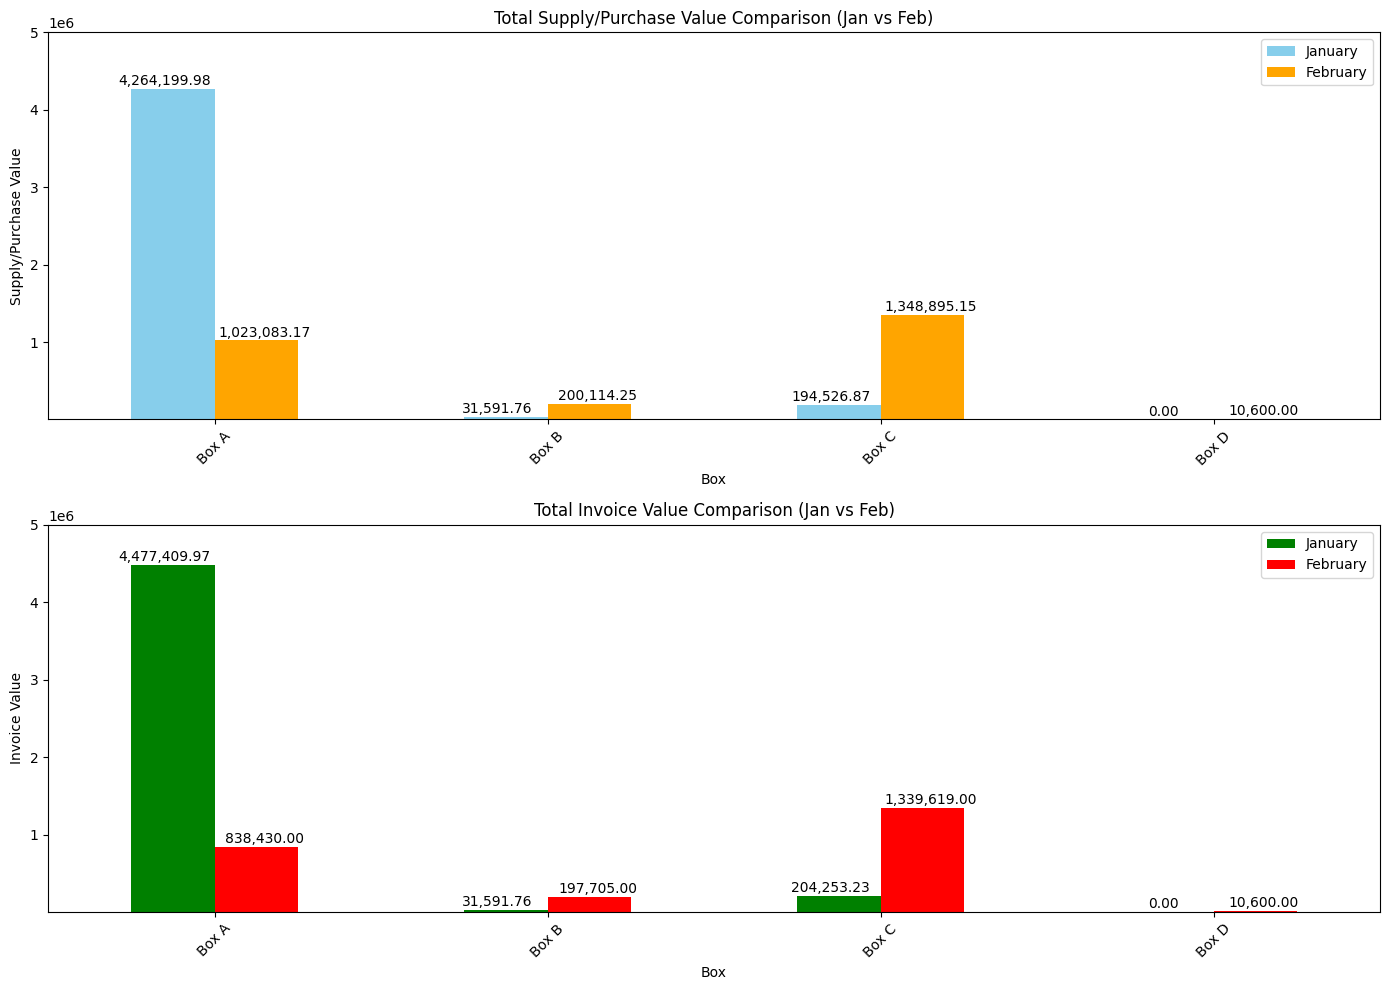

In [32]:
import matplotlib.pyplot as plt

# Plotting the comparison visualizations for January and February
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Total Supply/Purchase Value comparison
final.plot(x='Box', 
           y=['Total_Supply_Purchase_Value_Jan', 'Total_Supply_Purchase_Value_Feb'], 
           kind='bar', ax=axes[0], color=['skyblue', 'orange'])
axes[0].set_title('Total Supply/Purchase Value Comparison (Jan vs Feb)')
axes[0].set_ylabel('Supply/Purchase Value')
axes[0].legend(['January', 'February'])

# Set y-axis limits for the first plot
axes[0].set_ylim(5000, 5000000)

# Remove numeric ticks on the x-axis and set categorical labels
axes[0].set_xticklabels(final['Box'], rotation=45)

# Adding data labels for the first plot (Total Supply/Purchase Value)
for i, (v_jan, v_feb) in enumerate(zip(final['Total_Supply_Purchase_Value_Jan'], final['Total_Supply_Purchase_Value_Feb'])):
    axes[0].text(i - 0.15, v_jan + 50000, f"{v_jan:,.2f}", ha='center', color='black')
    axes[0].text(i + 0.15, v_feb + 50000, f"{v_feb:,.2f}", ha='center', color='black')

# Plot 2: Total Invoice Value comparison
final.plot(x='Box', 
           y=['Total_Invoice_Value_Jan', 'Total_Invoice_Value_Feb'], 
           kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Total Invoice Value Comparison (Jan vs Feb)')
axes[1].set_ylabel('Invoice Value')
axes[1].legend(['January', 'February'])

# Set y-axis limits for the second plot
axes[1].set_ylim(5000, 5000000)

# Remove numeric ticks on the x-axis and set categorical labels
axes[1].set_xticklabels(final['Box'], rotation=45)

# Adding data labels for the second plot (Total Invoice Value)
for i, (v_jan, v_feb) in enumerate(zip(final['Total_Invoice_Value_Jan'], final['Total_Invoice_Value_Feb'])):
    axes[1].text(i - 0.15, v_jan + 50000, f"{v_jan:,.2f}", ha='center', color='black')
    axes[1].text(i + 0.15, v_feb + 50000, f"{v_feb:,.2f}", ha='center', color='black')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
